In [302]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OneHotEncoder, StandardScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

In [303]:
x,y = make_classification(n_samples=1000, n_features=15, n_informative=10, n_redundant=2, n_clusters_per_class=2, weights=[0.9], flip_y=0, random_state=42)

In [304]:
# menyusun dataset menjadi dataframe untuk kemudahan
df = pd.DataFrame(x, columns=[f'fitur_{i}' for i in range(1,16)])
df['Target'] = y

# misalkan kita memiliki fitur katerogikal (simulasi fitur katerogikal )
df['fitur_12'] = np.random.choice(['A', 'B', 'C'], size=1000)
df['fitur_13'] = np.random.choice(['A', 'B', 'C'], size=1000)

df

,fitur_1,fitur_2,fitur_3,fitur_4,fitur_5,fitur_6,fitur_7,fitur_8,fitur_9,fitur_10,fitur_11,fitur_12,fitur_13,fitur_14,fitur_15,Target
0,-2.004037,-0.300167,1.131751,-0.165124,0.852518,-1.125499,-3.033989,-0.800344,-0.051292,0.608984,-1.592862,A,A,0.881201,1.750286,1
1,-1.079434,0.566202,3.565623,-0.795069,-2.458728,0.327632,-2.767325,-1.390250,-0.548227,-1.661581,-1.812616,A,C,-1.178076,-3.560837,0
2,1.429822,-2.311557,0.180454,-2.512073,-0.361891,0.881182,0.000224,-0.058583,1.381450,-1.131069,-0.422694,B,A,4.356675,4.473568,0
3,0.286150,0.697087,-1.567122,2.327085,0.533187,-1.087177,-0.641416,2.156160,-2.574622,0.625932,1.000528,B,C,2.890334,1.782801,0
4,2.642562,-2.622878,1.901570,-1.078246,0.131070,2.104958,-0.012366,0.993202,-0.300710,-0.149636,-0.792326,A,B,5.502696,0.111465,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-3.140480,-0.727318,0.123766,-4.746600,0.349771,1.576219,-1.433564,2.454337,0.096711,-0.336204,-0.689741,B,C,2.530319,-0.580613,0
996,-2.448124,-2.165319,1.844464,-2.500475,-1.284834,4.184587,-1.127591,1.199742,2.167883,0.966147,-0.509826,A,B,-0.356390,-3.707100,0
997,-0.719453,-3.617423,-0.161905,-2.284091,-2.129354,-2.648270,0.675664,-2.029091,-0.001528,0.913607,-2.563679,B,C,-1.100030,0.261778,0
998,3.865108,-2.445819,1.003759,0.982337,0.547374,2.119830,0.214463,2.577839,-3.581047,1.297298,1.868592,A,B,9.189434,-0.185094,0


In [305]:
# memisahkan fitur dependen dan independen (fitur dan target)
x = df.drop('Target', axis=1)
y = df['Target']


In [306]:
# melihat distribusi kelas
print("Distribusi kelas sebelum SMOTE:",Counter(y))

Distribusi kelas sebelum SMOTE: Counter({0: 901, 1: 99})


In [307]:
x_important

,fitur_1,fitur_2,fitur_3,fitur_4,fitur_5,fitur_6,fitur_8,fitur_9,fitur_11,fitur_14,fitur_15
0,-2.004037,-0.300167,1.131751,-0.165124,0.852518,-1.125499,-0.800344,-0.051292,-1.592862,0.881201,1.750286
1,-1.079434,0.566202,3.565623,-0.795069,-2.458728,0.327632,-1.390250,-0.548227,-1.812616,-1.178076,-3.560837
2,1.429822,-2.311557,0.180454,-2.512073,-0.361891,0.881182,-0.058583,1.381450,-0.422694,4.356675,4.473568
3,0.286150,0.697087,-1.567122,2.327085,0.533187,-1.087177,2.156160,-2.574622,1.000528,2.890334,1.782801
4,2.642562,-2.622878,1.901570,-1.078246,0.131070,2.104958,0.993202,-0.300710,-0.792326,5.502696,0.111465
...,...,...,...,...,...,...,...,...,...,...,...
995,-3.140480,-0.727318,0.123766,-4.746600,0.349771,1.576219,2.454337,0.096711,-0.689741,2.530319,-0.580613
996,-2.448124,-2.165319,1.844464,-2.500475,-1.284834,4.184587,1.199742,2.167883,-0.509826,-0.356390,-3.707100
997,-0.719453,-3.617423,-0.161905,-2.284091,-2.129354,-2.648270,-2.029091,-0.001528,-2.563679,-1.100030,0.261778
998,3.865108,-2.445819,1.003759,0.982337,0.547374,2.119830,2.577839,-3.581047,1.868592,9.189434,-0.185094


In [308]:
# Embedded Methods
# menggunakan Random Forest untuk mendapatkan fitur penting
rf_moddel = RandomForestClassifier(n_estimators=100, random_state=42)
x_integer = x.drop(['fitur_12',"fitur_13"], axis=1)
rf_moddel.fit(x_integer, y)

# mendapatkan fitur penting
importances = rf_moddel.feature_importances_
indices = np.argsort(importances)[::-1]

# menentukan ambang batas untuk fitur penting
threshold = 0.05 # misalnya, ambang batas 5%
important_features_indices = [i for i in range(len(importances)) if importances[i] >= threshold]

# menampilkan fitur penting beserta nilainya
print('Fitur yang dipilih dengan embedded methods (di atas ambang batas):')

for i in important_features_indices:
    # jika x asli berbentuk Dataframe, maka kita ambil nama kolom 
    print(f"{x.columns[i]}: {importances[i]}")

# mendapatkan nama kolom penting berdasarkan importance
important_features = x_integer.columns[important_features_indices]

#memindahkan fitur penting ke variabel baru
x_important = x_integer[important_features] # hanya fitur penting dari data pelathihan

# x important sekarang berisi fitur penting
print("\Dimensi data pelatihan dengan fitur penting:", x_important.shape)

Fitur yang dipilih dengan embedded methods (di atas ambang batas):
fitur_1: 0.10922645220080072
fitur_2: 0.07469055077791598
fitur_3: 0.0729197623048048
fitur_4: 0.07344715291208029
fitur_5: 0.09189301064056303
fitur_6: 0.10335341561768921
fitur_8: 0.09513293844064769
fitur_9: 0.0953657252979308
fitur_11: 0.09942017838478227
fitur_12: 0.057084421197424295
fitur_13: 0.06101057654219476
\Dimensi data pelatihan dengan fitur penting: (1000, 11)


In [309]:
len(x_important)

1000

In [310]:
x_selected = pd.concat([x_important, x['fitur_12']], axis=1)
x_selected = pd.concat([x_selected, x['fitur_13']], axis=1)
len(x_selected), len(x_important)

(1000, 1000)

In [311]:
from sklearn.preprocessing import LabelEncoder
 
label_encoder = LabelEncoder()
# Melakukan Encoding untuk fitur 12
x_selected['fitur_12'] = label_encoder.fit_transform(x['fitur_12'])
# print(label_encoder.inverse_transform(X_Selected[['Fitur_12']]))
# Melakukan Encoding untuk fitur 13|
x_selected['fitur_13'] = label_encoder.fit_transform(x_selected['fitur_13'])
# print(label_encoder.inverse_transform(X_Selected[['Fitur_13']]))

x_selected

,fitur_1,fitur_2,fitur_3,fitur_4,fitur_5,fitur_6,fitur_8,fitur_9,fitur_11,fitur_14,fitur_15,fitur_12,fitur_13
0,-2.004037,-0.300167,1.131751,-0.165124,0.852518,-1.125499,-0.800344,-0.051292,-1.592862,0.881201,1.750286,0,0
1,-1.079434,0.566202,3.565623,-0.795069,-2.458728,0.327632,-1.390250,-0.548227,-1.812616,-1.178076,-3.560837,0,2
2,1.429822,-2.311557,0.180454,-2.512073,-0.361891,0.881182,-0.058583,1.381450,-0.422694,4.356675,4.473568,1,0
3,0.286150,0.697087,-1.567122,2.327085,0.533187,-1.087177,2.156160,-2.574622,1.000528,2.890334,1.782801,1,2
4,2.642562,-2.622878,1.901570,-1.078246,0.131070,2.104958,0.993202,-0.300710,-0.792326,5.502696,0.111465,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-3.140480,-0.727318,0.123766,-4.746600,0.349771,1.576219,2.454337,0.096711,-0.689741,2.530319,-0.580613,1,2
996,-2.448124,-2.165319,1.844464,-2.500475,-1.284834,4.184587,1.199742,2.167883,-0.509826,-0.356390,-3.707100,0,1
997,-0.719453,-3.617423,-0.161905,-2.284091,-2.129354,-2.648270,-2.029091,-0.001528,-2.563679,-1.100030,0.261778,1,2
998,3.865108,-2.445819,1.003759,0.982337,0.547374,2.119830,2.577839,-3.581047,1.868592,9.189434,-0.185094,0,1


In [312]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
 
# Memilih kolom numerik
numeric_columns = x_selected.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop(['fitur_12', 'fitur_13'])
 
# Membuat salinan data untuk menjaga data asli tetap utuh
X_cleaned = x_important.copy()

In [313]:
len(X_cleaned), len(x_important)

(1000, 1000)

In [314]:
# Mengatasi outlier dengan IQR
outlier_indices = set()  # Gunakan set agar tidak ada duplikasi

for col in numeric_columns:
    # Melihat outlier dengan IQR (Interquartile Range)
    Q1 = X_cleaned[col].quantile(0.25)
    Q3 = X_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifikasi indeks outlier
    outliers = X_cleaned[(X_cleaned[col] < lower_bound) | (X_cleaned[col] > upper_bound)]
    
    # Tambahkan indeks outlier ke dalam set
    outlier_indices.update(outliers.index)

# Hapus semua outlier SEKALI SAJA
X_cleaned = X_cleaned.drop(index=outlier_indices)
y_cleaned = y.drop(index=outlier_indices)

# Reset index setelah penghapusan
X_cleaned = X_cleaned.reset_index(drop=True)
y_cleaned = y_cleaned.reset_index(drop=True)

# Tampilkan jumlah data setelah penghapusan
print("Jumlah data setelah menghapus outlier:", X_cleaned.shape[0])




Jumlah data setelah menghapus outlier: 922


In [315]:
len(X_cleaned), len(x_important)

(922, 1000)

In [316]:
len(X_cleaned), len(y_cleaned)

(922, 922)

In [317]:
# Inisialisasi SMOTE
smote = SMOTE(random_state=42)
 
# 3. Melakukan oversampling pada dataset
X_resampled, y_resampled = smote.fit_resample(X_cleaned, y_cleaned)
 
# Menampilkan distribusi kelas setelah SMOTE
print("Distribusi kelas setelah SMOTE:", Counter(y_resampled))
 
# Mengubah hasil menjadi DataFrame untuk visualisasi atau analisis lebih lanjut
X_resampled = pd.DataFrame(X_resampled)
y_resampled = pd.Series(y_resampled, name='Target')

Distribusi kelas setelah SMOTE: Counter({1: 838, 0: 838})


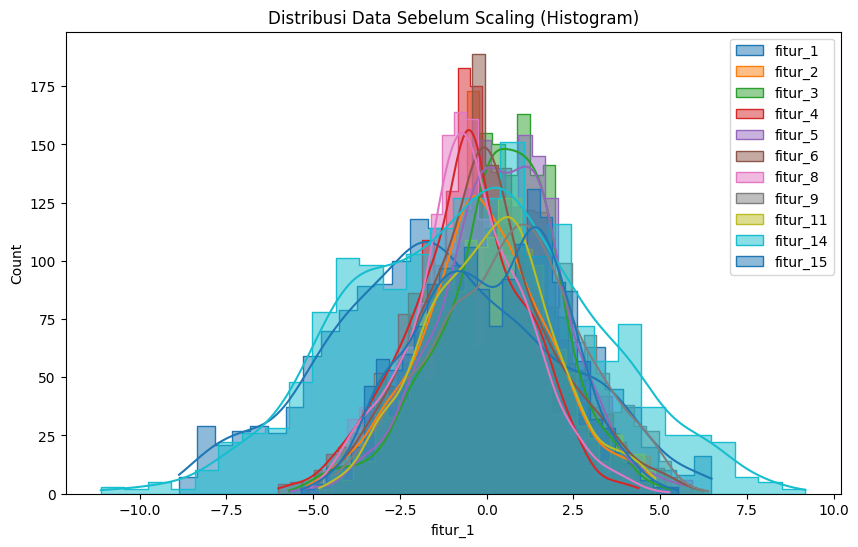

In [318]:
# 1. Visualisasi distribusi data sebelum scaling menggunakan histogram
plt.figure(figsize=(10, 6))
for col in X_resampled.columns:
    sns.histplot(X_resampled[col], kde=True, label=col, bins=30, element='step')
plt.title('Distribusi Data Sebelum Scaling (Histogram)')
plt.legend()
plt.show()

In [319]:
X_resampled.describe(include='all')


,fitur_1,fitur_2,fitur_3,fitur_4,fitur_5,fitur_6,fitur_8,fitur_9,fitur_11,fitur_14,fitur_15
count,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,-1.324663,-0.082028,0.354332,-0.600274,0.434311,0.006115,-0.490775,0.640703,0.090864,-0.474385,0.099907
std,3.203504,1.849720,1.757228,1.730869,1.788594,1.943148,1.689758,2.092164,1.815603,3.417578,2.009640
min,-8.864790,-5.180033,-5.701772,-6.002713,-5.643059,-4.846286,-5.057355,-4.360932,-4.821517,-11.118629,-5.349286
25%,-3.541542,-1.246830,-0.621067,-1.675831,-0.656019,-1.269100,-1.491242,-0.850035,-1.206051,-3.018800,-1.409812
50%,-1.485404,-0.162193,0.483473,-0.536868,0.467667,-0.100364,-0.556885,0.733994,0.118960,-0.354580,0.168566
75%,0.924065,1.100637,1.545546,0.565193,1.607793,1.196996,0.647325,2.099589,1.289191,1.952884,1.650554
max,6.481970,4.717954,5.273382,4.377074,5.922348,6.224330,5.265674,6.390253,4.860960,9.189434,5.510992


In [320]:
scaler = StandardScaler()
 
# Melakukan scaling pada fitur penting
X_resampled[important_features] = scaler.fit_transform(X_resampled[important_features])

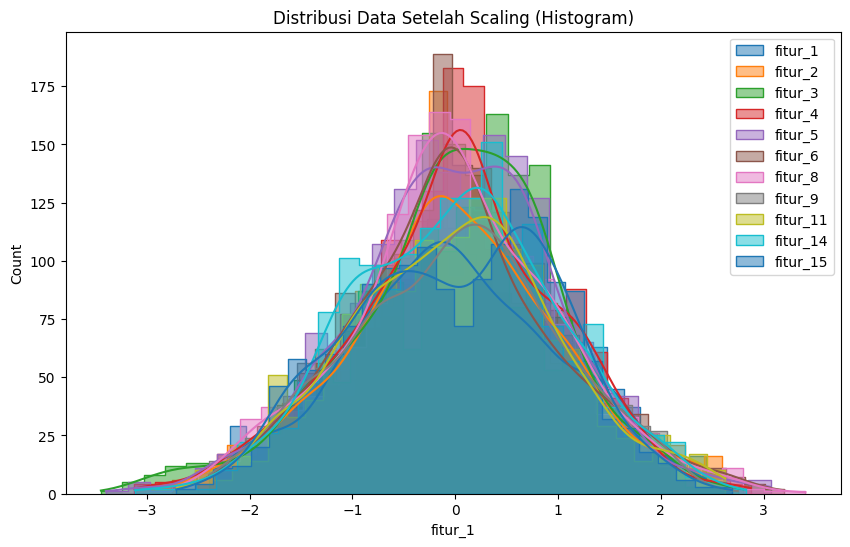

In [321]:
# 1. Visualisasi distribusi data sebelum scaling menggunakan histogram
plt.figure(figsize=(10, 6))
for col in X_resampled.columns:
    sns.histplot(X_resampled[col], kde=True, label=col, bins=30, element='step')
plt.title('Distribusi Data Setelah Scaling (Histogram)')
plt.legend()
plt.show()

In [322]:
X_resampled.describe(include='all')


,fitur_1,fitur_2,fitur_3,fitur_4,fitur_5,fitur_6,fitur_8,fitur_9,fitur_11,fitur_14,fitur_15
count,1.676000e+03,1.676000e+03,1.676000e+03,1.676000e+03,1676.000000,1.676000e+03,1.676000e+03,1.676000e+03,1.676000e+03,1.676000e+03,1.676000e+03
mean,2.967661e-17,8.479030e-18,-3.391612e-17,-3.391612e-17,0.000000,3.391612e-17,3.391612e-17,-3.391612e-17,-2.119758e-18,-2.543709e-17,-4.239515e-18
std,1.000298e+00,1.000298e+00,1.000298e+00,1.000298e+00,1.000298,1.000298e+00,1.000298e+00,1.000298e+00,1.000298e+00,1.000298e+00,1.000298e+00
min,-2.354414e+00,-2.756918e+00,-3.447425e+00,-3.122160e+00,-3.398861,-2.497931e+00,-2.703311e+00,-2.391365e+00,-2.706454e+00,-3.115487e+00,-2.712337e+00
25%,-6.922232e-01,-6.299057e-01,-5.552442e-01,-6.215822e-01,-0.609783,-6.564586e-01,-5.922538e-01,-7.127466e-01,-7.145299e-01,-7.447306e-01,-7.514627e-01
50%,-5.019154e-02,-4.335186e-02,7.351332e-02,3.664387e-02,0.018655,-5.481360e-02,-3.913553e-02,4.460396e-02,1.547932e-02,3.506596e-02,3.417505e-02
75%,7.021684e-01,6.395663e-01,6.780961e-01,6.735433e-01,0.656288,6.130447e-01,6.737294e-01,6.975179e-01,6.602124e-01,7.104427e-01,7.718346e-01
max,2.437632e+00,2.595752e+00,2.800159e+00,2.876493e+00,3.069268,3.201029e+00,3.407687e+00,2.748956e+00,2.628062e+00,2.828525e+00,2.693368e+00
